# Data Science HomeWork #2

In [73]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
## Data Import
df = pd.read_csv(join('data','winequality_red.csv'),sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
## Remove columns we do not use in this example
#del df['Id']
#del df['Species']
#df.head(5)

In [76]:
## Same functions to explore data
print(df.corr())
print()
print(df.dtypes)
print()
print(df.shape)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [77]:
## Train-Valiedation Split
## Index control by yourself

n_data = df.shape[0]
p_trn = 0.7
n_trn = round(n_data * p_trn)
n_tst = n_data - n_trn
print(n_data, n_trn, n_tst)

idx_data = pd.Series(range(0,1599))
idx_data_perm = np.random.permutation(idx_data)
print(idx_data_perm)

idx_trn = idx_data_perm[0:n_trn]
idx_tst = idx_data_perm[n_trn:n_data]
print(len(idx_trn),len(idx_tst))

# Train:Test = 7:3으로 맞춰주기위해 수동으로 작업을 해줌
# 우선 Train Test의 개수를 계산한 후
# Random Permutation을 통해
# index를 계산해줌

1599 1119 480
[ 793  242 1500 ...  256 1254 1434]
1119 480


In [78]:
# 계산된 index에 맞춰 데이터 분할
trnx = df.iloc[idx_trn,0:11]
trny = df.iloc[idx_trn,11]
tstx = df.iloc[idx_tst,0:11]
tsty = df.iloc[idx_tst,11]

In [79]:
# 혹은 scikit learn에서 제공해주는 함수를 사용할 수도 있음
## )r you can use just this 
#from sklearn.model_selection import train_test_split

#trnx, tstx, trny, tsty = train_test_split(df.iloc[:,0:11], df.iloc[:,11], test_size=0.3, random_state=123)

## Linear Regression

In [80]:
# Resgression Learning
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=trnx, y=trny)
lr_pred = model.predict(X=tstx)
print(lr_pred)

[5.20080684 5.60373603 4.91129103 5.18033916 5.17893485 5.34591683
 6.11969462 5.61842536 5.60632185 5.56575632 6.61104606 4.97193552
 6.17245456 5.49594342 6.2407024  5.03519153 5.36383483 5.39411488
 6.65121409 6.34925185 5.10732162 5.97434367 4.99273601 5.32993643
 5.69584551 6.02130462 5.23868694 5.88612533 5.59046013 5.47952609
 5.23802507 5.63071109 5.99568991 5.87893031 6.48441451 5.71532629
 5.62403935 6.23836929 5.13882754 6.15768475 5.17730011 4.74529145
 5.37339019 5.20636514 6.24850612 6.80083664 5.46856457 5.40541252
 5.35597335 4.88823093 5.1470784  5.35440466 5.60791018 5.32394541
 5.36763231 6.55672551 6.63065651 6.3093164  6.07054068 6.44748013
 5.32659033 6.13219434 6.72407328 6.24160796 5.58296561 5.78066059
 5.0043959  5.47163846 6.80058149 5.34852122 5.07403948 6.19151719
 6.03294705 5.96584393 5.34737031 5.18999726 5.43051454 5.47472963
 6.04579545 5.56287887 5.2874934  5.50011499 4.95693735 5.49838085
 4.8015733  4.55957312 6.44778986 6.30056973 5.16792909 6.4134

In [81]:
np.sqrt(np.mean((np.square(lr_pred - tsty))))

0.6834595769706395

In [82]:
print(tsty - lr_pred)

55     -0.200807
1468    1.396264
266    -0.911291
673    -0.180339
2      -0.178935
          ...   
461    -0.262424
642    -0.280607
256    -0.618763
1254   -0.616559
1434    0.783360
Name: quality, Length: 480, dtype: float64


[15301.86932918]


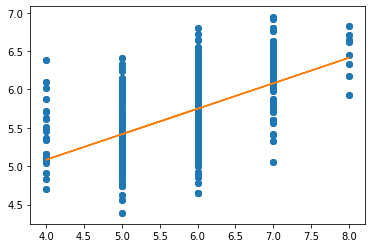

In [83]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred)
plt.plot(tsty,lr_pred,'o')
m,b = np.polyfit(tsty,lr_pred,1)
plt.plot(tsty, m*tsty+b)
print(np.correlate(tsty, lr_pred))

In [84]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred))
print('R2:',metrics.r2_score(tsty, lr_pred))


RMSE: 0.6834595769706395
MAE: 0.5310964560091583
R2: 0.3085039400888926


## Lasso Regression

In [85]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)
print(lr_pred_lasso)

[5.64564245 5.61154932 5.58503244 5.76686248 5.61154932 5.53199868
 5.76686248 5.71761684 5.63427808 5.66837121 5.65321871 5.57366807
 5.7554981  5.72898122 5.71004059 5.52821056 5.52063431 5.65700683
 5.40320241 5.61912557 5.41835491 5.46381242 5.36153303 5.66837121
 5.7403456  5.75170997 5.69867621 5.74413372 5.3274399  5.75170997
 5.4903293  5.59639682 5.70625247 5.76307435 5.72519309 5.69867621
 5.78201498 5.6077612  5.55851556 5.70625247 5.4600243  5.60397307
 5.7403456  5.68352371 5.77443873 5.77822685 5.66458308 5.77443873
 5.71761684 5.49790555 5.33501615 5.69488809 5.61912557 5.72898122
 5.6077612  5.60018495 5.65700683 5.71382872 5.78580311 5.53578681
 5.66837121 5.73655747 5.69109996 5.71382872 5.73276935 5.61533745
 5.4600243  5.75928623 5.77443873 5.61912557 5.39941428 5.7706506
 5.74792185 5.72519309 5.77443873 5.67215933 5.75170997 5.69867621
 5.72140497 5.69109996 5.63427808 5.69867621 5.76307435 5.71004059
 5.47896492 5.26682988 5.68731184 5.65700683 5.56609181 5.74034

In [86]:
np.sqrt(np.mean((np.square(lr_pred_lasso - tsty))))

0.811898535224369

In [87]:
print(tsty - lr_pred_lasso)

55     -0.645642
1468    1.388451
266    -1.585032
673    -0.766862
2      -0.611549
          ...   
461    -0.744134
642    -0.664583
256    -0.766862
1254   -0.683524
1434    0.543764
Name: quality, Length: 480, dtype: float64


[15242.49349026]


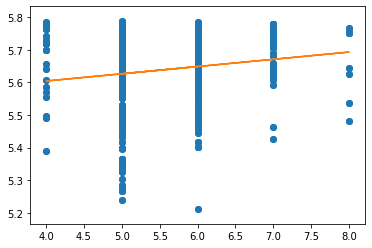

In [88]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred_lasso)
plt.plot(tsty,lr_pred_lasso,'o')
m,b = np.polyfit(tsty,lr_pred_lasso,1)
plt.plot(tsty, m*tsty+b)
print(np.correlate(tsty, lr_pred_lasso))

In [89]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_lasso,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred_lasso))
print('R2:',metrics.r2_score(tsty, lr_pred_lasso))

RMSE: 0.8118985352243688
MAE: 0.6778247015342198
R2: 0.02418484481730654


## Ridge Regression

In [90]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)
print(lr_pred_ridge)

[5.20754983 5.60171726 4.95228531 5.16850367 5.18125336 5.40387424
 6.12153923 5.60180985 5.60972584 5.5710581  6.60347607 4.94145715
 6.15510557 5.48916711 6.19428466 5.03487055 5.32287486 5.41181731
 6.61759993 6.32986641 5.08870107 5.95204263 4.9890985  5.3313489
 5.72877258 6.0900452  5.24328724 5.90420795 5.57635607 5.48122149
 5.23874628 5.67233404 5.9831013  5.87398345 6.45750065 5.75800034
 5.62404403 6.18773033 5.14117235 6.14022211 5.17018195 4.7330736
 5.36152839 5.19196299 6.22866996 6.77244955 5.46719948 5.4230481
 5.33326457 4.88620118 5.14043312 5.34046993 5.61320485 5.35370755
 5.39030371 6.47512408 6.62187513 6.31104605 6.06532789 6.43659693
 5.3191407  6.05293859 6.73784985 6.18267805 5.58681158 5.77577359
 5.0313915  5.48948501 6.806888   5.33740112 5.13913937 6.16927373
 6.03654368 5.97035427 5.33968545 5.19159884 5.45973115 5.44857293
 6.06698387 5.58270411 5.2842448  5.49477637 4.95617511 5.46817648
 4.80888124 4.56283345 6.42478878 6.25056148 5.16080308 6.3729953

In [91]:
np.sqrt(np.mean((np.square(lr_pred_ridge - tsty))))

0.6837361837685478

In [92]:
print(tsty - lr_pred_ridge)

55     -0.207550
1468    1.398283
266    -0.952285
673    -0.168504
2      -0.181253
          ...   
461    -0.261972
642    -0.274170
256    -0.598409
1254   -0.621402
1434    0.747239
Name: quality, Length: 480, dtype: float64


[15301.1910408]


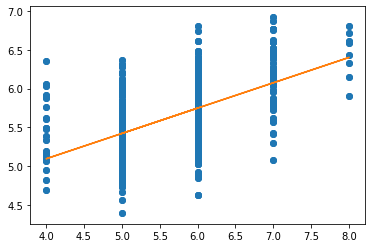

In [93]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred_ridge)
plt.plot(tsty,lr_pred_ridge,'o')
m,b = np.polyfit(tsty,lr_pred_ridge,1)
plt.plot(tsty, m*tsty+b)
print(np.correlate(tsty, lr_pred_ridge))

In [94]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_ridge,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred_ridge))
print('R2:',metrics.r2_score(tsty, lr_pred_ridge))

RMSE: 0.6837361837685474
MAE: 0.5307027169107269
R2: 0.30794410824854657


In [95]:
print(model.coef_)
print(model_lasso.coef_)
print(model_ridge.coef_)
#회귀계수

[ 6.11940150e-03 -1.17357209e+00 -6.39488984e-02  1.90357818e-02
 -1.87090893e+00  2.14203086e-03 -3.31371585e-03 -1.64558255e+01
 -4.76499856e-01  8.66117648e-01  2.71207000e-01]
[ 0.         -0.          0.          0.         -0.          0.
 -0.00378813 -0.         -0.          0.          0.        ]
[-0.00237345 -1.18860153 -0.08355217  0.01060938 -1.21338882  0.00224704
 -0.00322109 -0.01494127 -0.47637933  0.76057138  0.29345176]
